In [2]:
# import torch
# print(torch.cuda.is_available())
# print(torch.cuda.get_device_name(0))

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/deepfake-with-cropped-faces-from-video/FF_Face_only_data/FF_Face_only_data/123.mp4
/kaggle/input/deepfake-with-cropped-faces-from-video/FF_Face_only_data/FF_Face_only_data/738.mp4
/kaggle/input/deepfake-with-cropped-faces-from-video/FF_Face_only_data/FF_Face_only_data/479.mp4
/kaggle/input/deepfake-with-cropped-faces-from-video/FF_Face_only_data/FF_Face_only_data/660.mp4
/kaggle/input/deepfake-with-cropped-faces-from-video/FF_Face_only_data/FF_Face_only_data/479_706.mp4
/kaggle/input/deepfake-with-cropped-faces-from-video/FF_Face_only_data/FF_Face_only_data/565.mp4
/kaggle/input/deepfake-with-cropped-faces-from-video/FF_Face_only_data/FF_Face_only_data/033.mp4
/kaggle/input/deepfake-with-cropped-faces-from-video/FF_Face_only_data/FF_Face_only_data/481_469.mp4
/kaggle/input/deepfake-with-cropped-faces-from-video/FF_Face_only_data/FF_Face_only_data/726.mp4
/kaggle/input/deepfake-with-cropped-faces-from-video/FF_Face_only_data/FF_Face_only_data/184_205.mp4
/kaggle/input/deep

In [4]:
import os
import pandas as pd

# List of all dataset directories
dataset_paths = [
    '/kaggle/input/deepfake-with-cropped-faces-from-video/Celeb_fake_face_only/Celeb_fake_face_only',
    '/kaggle/input/deepfake-with-cropped-faces-from-video/Celeb_real_face_only/Celeb_real_face_only',
    '/kaggle/input/deepfake-with-cropped-faces-from-video/DFDC_FAKE_Face_only_data/DFDC_FAKE_Face_only_data',
    '/kaggle/input/deepfake-with-cropped-faces-from-video/DFDC_REAL_Face_only_data/DFDC_REAL_Face_only_data',
    '/kaggle/input/deepfake-with-cropped-faces-from-video/FF_Face_only_data/FF_Face_only_data'
]

# Metadata list
metadata = []

# Function to classify video (fake or real)
def classify_video(filename, dataset_name):
    # Special case for FF_Face_only_data dataset
    if "FF_Face_only_data" in dataset_name:
        if "_" in filename:
            return "fake"
        else:
            return "real"
    
    # General case: based on dataset name (case insensitive)
    dataset_name_lower = dataset_name.lower()
    if "fake" in dataset_name_lower:
        return "fake"
    elif "real" in dataset_name_lower:
        return "real"
    
    return "unknown"  # Default in case the dataset name does not match expected patterns


# Traverse each dataset path and process the videos
for dataset_path in dataset_paths:
    # Extract the dataset name from the path
    dataset_name = dataset_path.split("/")[-2]
    
    # Iterate over files in the dataset directory
    for root, dirs, files in os.walk(dataset_path):
        for file in files:
            if file.endswith('.mp4'):  # Only consider .mp4 video files
                file_path = os.path.join(root, file)
                label = classify_video(file, dataset_name)
                
                # Append to metadata list
                metadata.append([file_path, dataset_name, label])

# Convert metadata list to DataFrame
metadata_df = pd.DataFrame(metadata, columns=["file_path", "dataset", "label"])

# Save metadata to CSV
metadata_df.to_csv('/kaggle/working/metadata.csv', index=False)

# Optional: Display metadata to verify
metadata_df.head()

,file_path,dataset,label
0,/kaggle/input/deepfake-with-cropped-faces-from...,Celeb_fake_face_only,fake
1,/kaggle/input/deepfake-with-cropped-faces-from...,Celeb_fake_face_only,fake
2,/kaggle/input/deepfake-with-cropped-faces-from...,Celeb_fake_face_only,fake
3,/kaggle/input/deepfake-with-cropped-faces-from...,Celeb_fake_face_only,fake
4,/kaggle/input/deepfake-with-cropped-faces-from...,Celeb_fake_face_only,fake


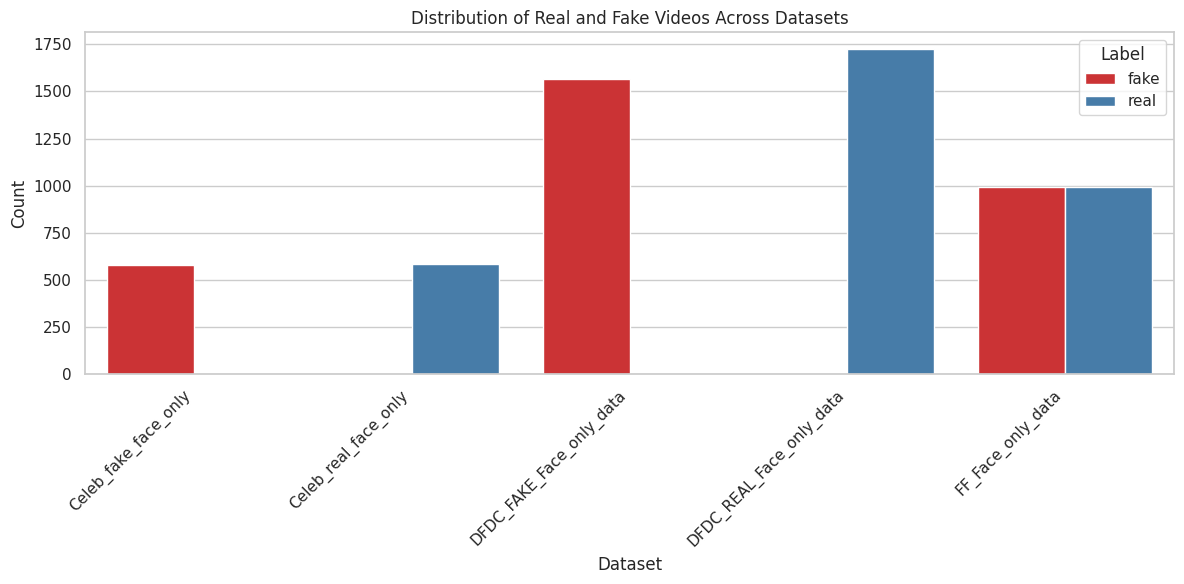

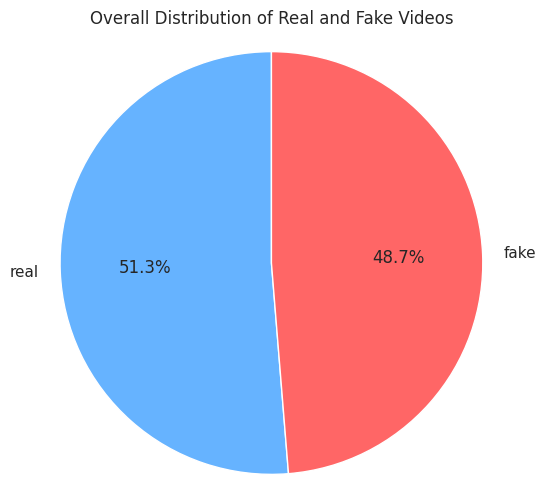

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load metadata from CSV
metadata_df = pd.read_csv('/kaggle/working/metadata.csv')

# Set up the plot styles
sns.set(style="whitegrid")

# 1. Count plot: Distribution of fake and real labels across different datasets
plt.figure(figsize=(12, 6))
sns.countplot(data=metadata_df, x='dataset', hue='label', palette='Set1')
plt.title('Distribution of Real and Fake Videos Across Datasets')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Dataset')
plt.ylabel('Count')
plt.legend(title='Label', loc='upper right')
plt.tight_layout()
plt.show()

# 2. Pie chart: Overall distribution of real and fake labels
label_counts = metadata_df['label'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff6666'])
plt.title('Overall Distribution of Real and Fake Videos')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.show()

Columns in metadata: Index(['file_path', 'dataset', 'label'], dtype='object')
Loading fake video from: /kaggle/input/deepfake-with-cropped-faces-from-video/Celeb_fake_face_only/Celeb_fake_face_only/id46_id44_0000.mp4
Loading real video from: /kaggle/input/deepfake-with-cropped-faces-from-video/Celeb_real_face_only/Celeb_real_face_only/id40_0005.mp4
Loading fake video from: /kaggle/input/deepfake-with-cropped-faces-from-video/DFDC_FAKE_Face_only_data/DFDC_FAKE_Face_only_data/dibgdfklfh.mp4
Loading real video from: /kaggle/input/deepfake-with-cropped-faces-from-video/DFDC_REAL_Face_only_data/DFDC_REAL_Face_only_data/rltsrqhbff.mp4
Loading real video from: /kaggle/input/deepfake-with-cropped-faces-from-video/FF_Face_only_data/FF_Face_only_data/872.mp4
Loading fake video from: /kaggle/input/deepfake-with-cropped-faces-from-video/FF_Face_only_data/FF_Face_only_data/626_562.mp4


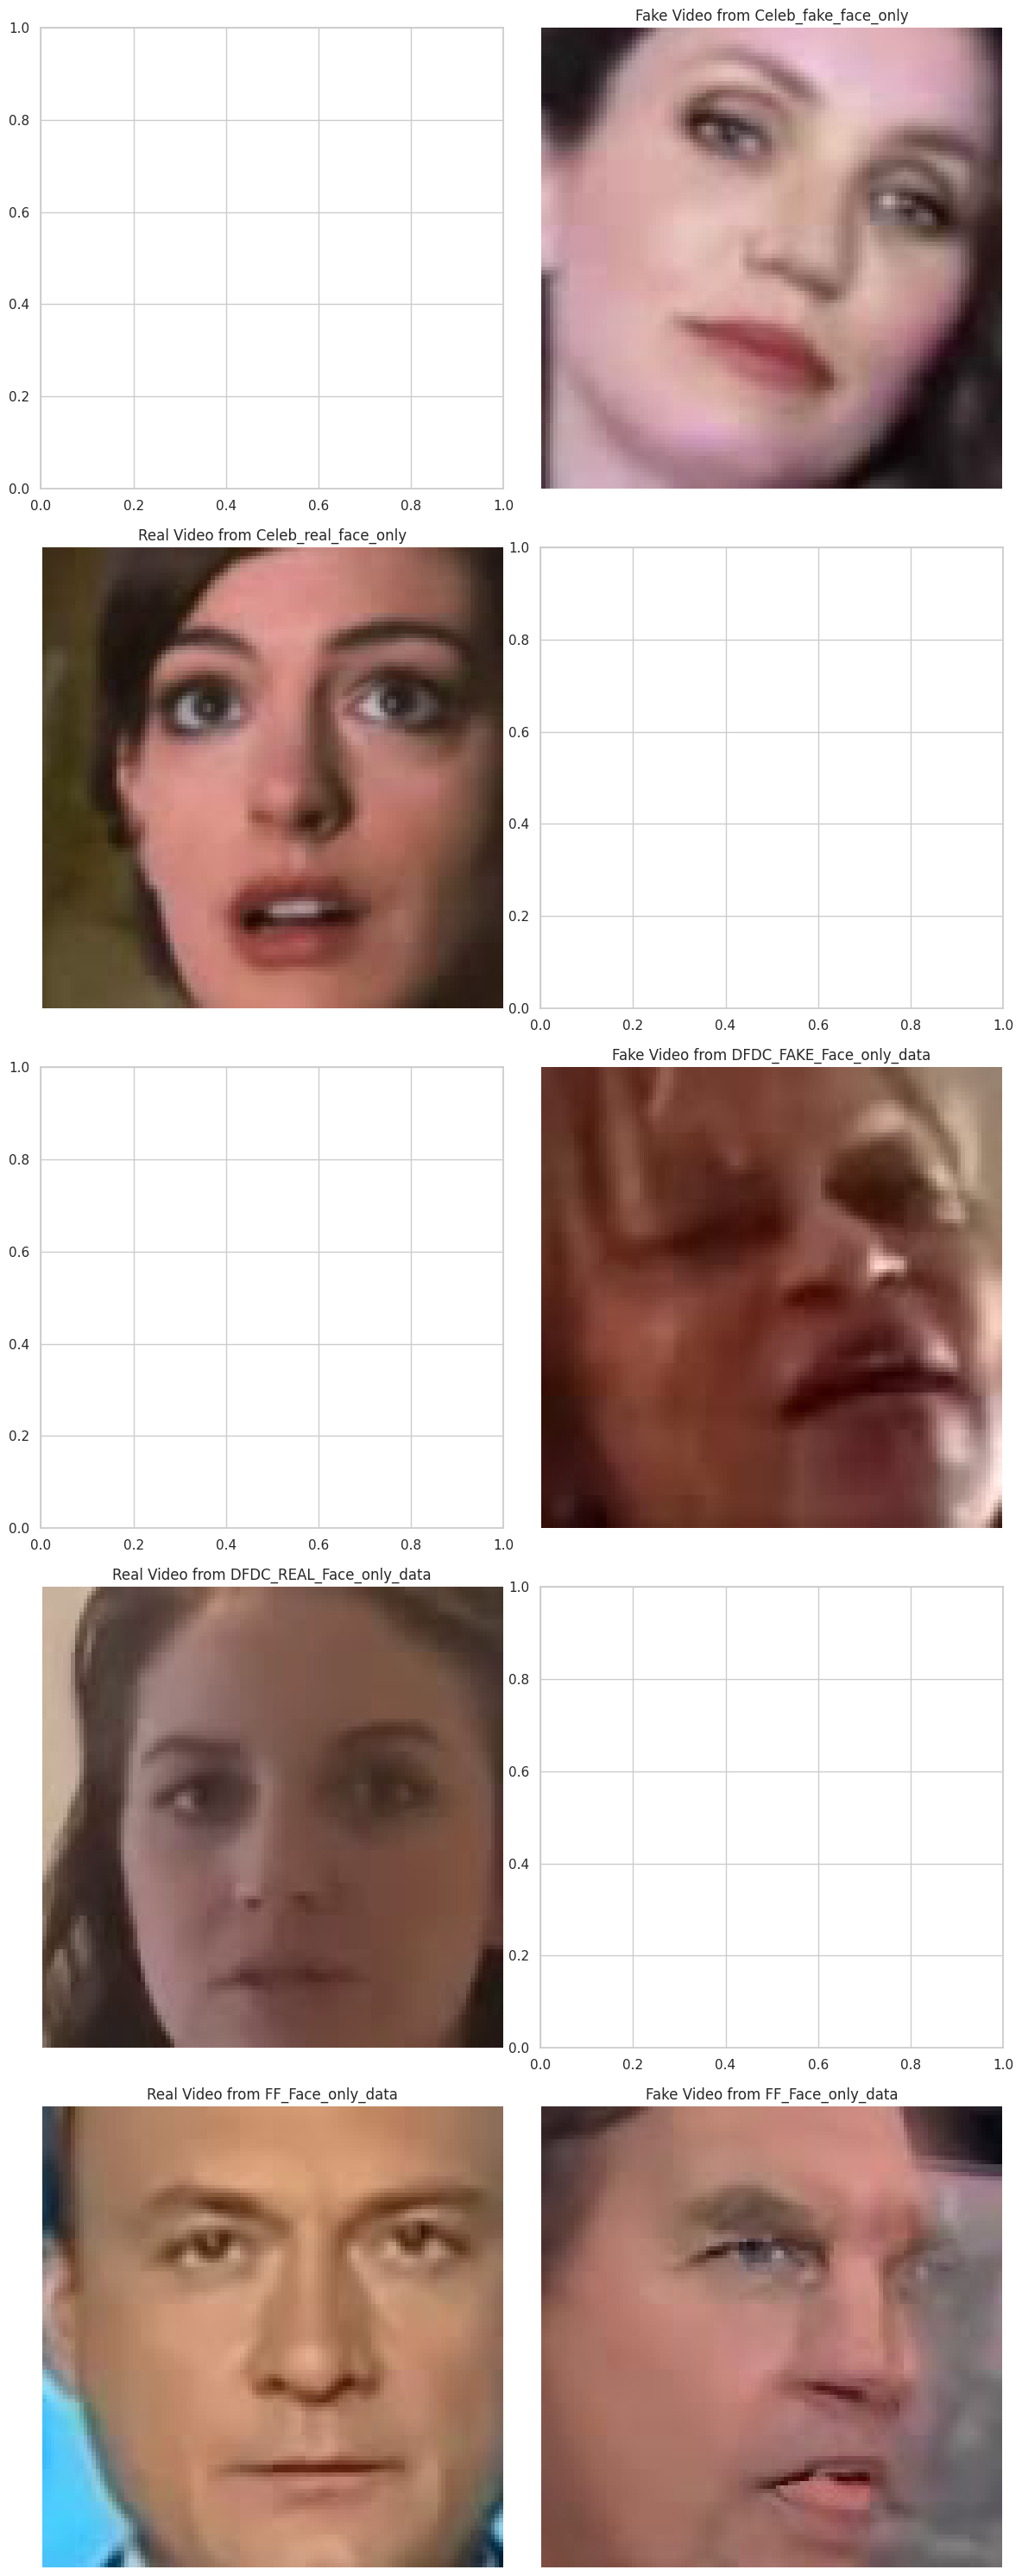

In [6]:
import cv2
import random
import matplotlib.pyplot as plt
import pandas as pd
import os

# Load metadata
metadata_df = pd.read_csv('/kaggle/working/metadata.csv')

# Check the columns to identify the correct name for the video path
print("Columns in metadata:", metadata_df.columns)

# Define function to extract the first frame from a video
def extract_frame(video_path):
    if not os.path.exists(video_path):  # Check if the video file exists
        print(f"Error: Video file does not exist at path: {video_path}")
        raise FileNotFoundError(f"Video file not found at {video_path}")
    
    video = cv2.VideoCapture(video_path)
    ret, frame = video.read()
    if not ret:
        print(f"Error: Could not read video file at path: {video_path}")
        raise ValueError(f"Could not read video from {video_path}")
    
    # Convert to RGB (as OpenCV reads frames in BGR)
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    video.release()
    return frame

# Get list of unique datasets
datasets = metadata_df['dataset'].unique()

# Set up plot grid
fig, axes = plt.subplots(len(datasets), 2, figsize=(12, len(datasets)*6))
axes = axes.flatten()

# Iterate over each dataset
for i, dataset in enumerate(datasets):
    dataset_metadata = metadata_df[metadata_df['dataset'] == dataset]
    
    # Select 1 real and 1 fake video (if available)
    real_videos = dataset_metadata[dataset_metadata['label'] == 'real']
    fake_videos = dataset_metadata[dataset_metadata['label'] == 'fake']
    
    # Ensure we have at least 1 video from each label, if available
    if not real_videos.empty:
        real_video_sample = real_videos.sample(1)
    else:
        real_video_sample = pd.DataFrame()  # Empty if no real video
    
    if not fake_videos.empty:
        fake_video_sample = fake_videos.sample(1)
    else:
        fake_video_sample = pd.DataFrame()  # Empty if no fake video
    
    # Plot real video
    for j, video_row in enumerate(real_video_sample.itertuples()):
        video_path = video_row.file_path  # Use 'file_path' here
        print(f"Loading real video from: {video_path}")  # Print the path
        try:
            frame = extract_frame(video_path)
            axes[i*2].imshow(frame)
            axes[i*2].set_title(f'Real Video from {dataset}')
            axes[i*2].axis('off')
        except (FileNotFoundError, ValueError) as e:
            print(f"Skipping real video due to error: {e}")
    
    # Plot fake video
    for j, video_row in enumerate(fake_video_sample.itertuples()):
        video_path = video_row.file_path  # Use 'file_path' here
        print(f"Loading fake video from: {video_path}")  # Print the path
        try:
            frame = extract_frame(video_path)
            axes[i*2 + 1].imshow(frame)
            axes[i*2 + 1].set_title(f'Fake Video from {dataset}')
            axes[i*2 + 1].axis('off')
        except (FileNotFoundError, ValueError) as e:
            print(f"Skipping fake video due to error: {e}")

plt.tight_layout()
plt.show()

In [7]:
import pandas as pd

# Read the dataset
metadata_df = pd.read_csv('metadata.csv')

# Fetch unique values from the 'dataset' column
unique_datasets = metadata_df['dataset'].unique()

# Print the unique dataset values
print(unique_datasets)

['Celeb_fake_face_only' 'Celeb_real_face_only' 'DFDC_FAKE_Face_only_data'
 'DFDC_REAL_Face_only_data' 'FF_Face_only_data']


In [8]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
import sys
sys.version

'3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]'

In [9]:
!pip install face_recognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 18.9 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566166 sha256=2a6c10cea10764f864db723a216c18614abe0ce12feabf26db428bb70a496c10
  Stored in directory: /root/.cache/pip/wheels/8f/47/c8/f44c5aebb7507f7c8a2c0bd23151d732d0f0bd6884ad4ac635
Successfully built face-recognition-models


In [10]:
#THis code is to check if the video is corrupted or not..
#If the video is corrupted delete the video.
import glob
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
from torch.utils.data.dataset import Dataset
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
#Check if the file is corrupted or not
def validate_video(vid_path,train_transforms):
      transform = train_transforms
      count = 20
      video_path = vid_path
      frames = []
      a = int(100/count)
      first_frame = np.random.randint(0,a)
      temp_video = video_path.split('/')[-1]
      for i,frame in enumerate(frame_extract(video_path)):
        frames.append(transform(frame))
        if(len(frames) == count):
          break
      frames = torch.stack(frames)
      frames = frames[:count]
      return frames
#extract a from from video
def frame_extract(path):
  vidObj = cv2.VideoCapture(path) 
  success = 1
  while success:
      success, image = vidObj.read()
      if success:
          yield image

im_size = 112
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

train_transforms = transforms.Compose([
                                        transforms.ToPILImage(),
                                        transforms.Resize((im_size,im_size)),
                                        transforms.ToTensor(),
                                        transforms.Normalize(mean,std)])

BASE_PATH="/kaggle/input/deepfake-with-cropped-faces-from-video"

video_files =  glob.glob(f"{BASE_PATH}/Face_only_data/Face_only_data/*.mp4")
video_files += glob.glob(f"{BASE_PATH}/Celeb_real_face_only/Celeb_real_face_only/*.mp4")
video_files += glob.glob(f"{BASE_PATH}/DFDC_FAKE_Face_only_data/DFDC_FAKE_Face_only_data/*.mp4")
video_files += glob.glob(f"{BASE_PATH}/DFDC_REAL_Face_only_data/DFDC_REAL_Face_only_data/*.mp4")
video_files += glob.glob(f"{BASE_PATH}/FF_Face_only_data/FF_Face_only_data/*.mp4")
print("Total no of videos :" , len(video_files))
# print(video_files)
count = 0;
for vid in video_files:
  try:
    validate_video(vid,train_transforms)
    count+=1
  except:
    print("Deleting corrupted video:", vid)
    os.remove(vid)
      
print("Deleted length: ",(len(video_files) - count))

Total no of videos : 5870
Deleted length:  0


In [11]:
#to load preprocessod video to memory
import json
import glob
import numpy as np
import cv2
import copy
import random
random.shuffle(video_files)
random.shuffle(video_files)
frame_count = []
for video_file in video_files:
  cap = cv2.VideoCapture(video_file)
  if(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))<100):
    video_files.remove(video_file)
    continue
  frame_count.append(int(cap.get(cv2.CAP_PROP_FRAME_COUNT)))
print("frames are " , frame_count)
print("Total no of video: " , len(frame_count))
print('Average frame per video:',np.mean(frame_count))

frames are  [148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 143, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 144, 148, 148, 148, 148, 146, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 143, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 143, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 146, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 14

In [12]:
# load the video name and labels from csv
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
from torch.utils.data.dataset import Dataset
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
# import face_recognition
class video_dataset(Dataset):
    def __init__(self,video_names,labels,sequence_length = 60,transform = None):
        self.video_names = video_names
        self.labels = labels
        self.transform = transform
        self.count = sequence_length
    def __len__(self):
        return len(self.video_names)
    def __getitem__(self,idx):
        video_path = self.video_names[idx]
        frames = []
        a = int(100/self.count)
        first_frame = np.random.randint(0,a)
        temp_video = video_path.split('/')[-1]
        #print(temp_video)
        label = self.labels.iloc[(labels.loc[labels["filename"] == temp_video].index.values[0]),1]
        if(label == 'fake'):
          label = 0
        if(label == 'real'):
          label = 1
        for i,frame in enumerate(self.frame_extract(video_path)):
          frames.append(self.transform(frame))
          if(len(frames) == self.count):
            break
        frames = torch.stack(frames)
        frames = frames[:self.count]
        #print("length:" , len(frames), "label",label)
        return frames,label
    def frame_extract(self,path):
      vidObj = cv2.VideoCapture(path)
      success = 1
      while success:
          success, image = vidObj.read()
          if success:
              yield image
#plot the image
def im_plot(tensor):
    image = tensor.cpu().numpy().transpose(1,2,0)
    b,g,r = cv2.split(image)
    image = cv2.merge((r,g,b))
    image = image*[0.22803, 0.22145, 0.216989] +  [0.43216, 0.394666, 0.37645]
    image = image*255.0
    plt.imshow(image.astype(int))
    plt.show()

In [13]:
def number_of_real_and_fake_videos(data_list):
    real = 0
    fake = 0
    missing = 0

    for path in data_list:
        filename = path.split('/')[-1]   # 🔥 FIX

        if filename not in label_dict:
            missing += 1
            continue

        if label_dict[filename] == 'real':
            real += 1
        elif label_dict[filename] == 'fake':
            fake += 1

    if missing > 0:
        print(f"⚠️ Missing labels for {missing} videos")

    return real, fake


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-15..205].


Total videos after filtering: 5847
(3301, 2546)
train :  4677
test :  1170
TRAIN:  Real: 2654  Fake: 2023
TEST:  Real: 647  Fake: 523


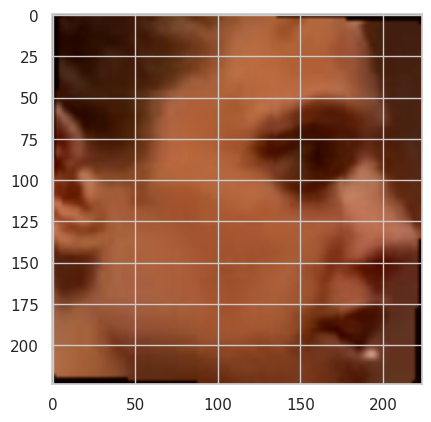

In [14]:
# load the labels and video in data loader
import random
import pandas as pd
from sklearn.model_selection import train_test_split


labels = pd.read_csv('/kaggle/working/metadata.csv')
labels = labels[['file_path', 'label']]
labels['filename'] = labels['file_path'].apply(lambda x: x.split('/')[-1])
valid_filenames = set(labels['filename'])
video_files = [
    v for v in video_files
    if v.split('/')[-1] in valid_filenames
]
label_dict = dict(zip(labels['filename'], labels['label']))
print("Total videos after filtering:", len(video_files))
print(number_of_real_and_fake_videos(video_files))



#print(labels)

split = int(0.8 * len(video_files))
train_videos = video_files[:split]
valid_videos = video_files[split:]




print("train : " , len(train_videos))
print("test : " , len(valid_videos))
# train_videos,valid_videos = train_test_split(data,test_size = 0.2)
# print(train_videos)

print("TRAIN: ", "Real:",number_of_real_and_fake_videos(train_videos)[0]," Fake:",number_of_real_and_fake_videos(train_videos)[1])
print("TEST: ", "Real:",number_of_real_and_fake_videos(valid_videos)[0]," Fake:",number_of_real_and_fake_videos(valid_videos)[1])


im_size = 224
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

# Enhanced training transforms with augmentation
train_transforms = transforms.Compose([
                                        transforms.ToPILImage(),
                                        transforms.RandomRotation(10),  # Random rotation
                                        transforms.ColorJitter(brightness=0.2, contrast=0.2),  # Color jitter
                                        transforms.RandomHorizontalFlip(p=0.5),  # Random flip
                                        transforms.Resize((im_size,im_size)),
                                        transforms.ToTensor(),
                                        transforms.Normalize(mean,std)])

# No augmentation for validation
test_transforms = transforms.Compose([
                                        transforms.ToPILImage(),
                                        transforms.Resize((im_size,im_size)),
                                        transforms.ToTensor(),
                                        transforms.Normalize(mean,std)])

train_data = video_dataset(train_videos,labels,sequence_length = 10,transform = train_transforms)
#print(train_data)
val_data = video_dataset(valid_videos,labels,sequence_length = 10,transform = test_transforms)  # Use test_transforms for validation
train_loader = DataLoader(train_data,batch_size = 4,shuffle = True,num_workers = 4)
valid_loader = DataLoader(val_data,batch_size = 4,shuffle = False,num_workers = 4)  # shuffle=False for validation
image,label = train_data[0]
im_plot(image[0,:,:,:])

In [15]:
#Model with feature visualization
from torch import nn
from torchvision import models
class Model(nn.Module):
    def __init__(self, num_classes,latent_dim= 2048, lstm_layers=1 , hidden_dim = 2048, bidirectional = False):
        super(Model, self).__init__()
        model = models.resnext50_32x4d(pretrained = True) #Residual Network CNN
        self.model = nn.Sequential(*list(model.children())[:-2])
        self.lstm = nn.LSTM(latent_dim,hidden_dim, lstm_layers,  bidirectional)
        self.relu = nn.LeakyReLU()
        self.dp1 = nn.Dropout(0.5)  # Increased dropout
        self.dp2 = nn.Dropout(0.5)  # Additional dropout after LSTM
        self.linear1 = nn.Linear(2048,num_classes)
        self.avgpool = nn.AdaptiveAvgPool2d(1)
    def forward(self, x):
        batch_size,seq_length, c, h, w = x.shape
        x = x.view(batch_size * seq_length, c, h, w)
        fmap = self.model(x)
        x = self.avgpool(fmap)
        x = x.view(batch_size,seq_length,2048)
        x = self.dp1(x)  # Apply dropout before LSTM
        x_lstm,_ = self.lstm(x,None)
        x_lstm = self.dp2(x_lstm)  # Apply dropout after LSTM
        return fmap,self.linear1(torch.mean(x_lstm,dim = 1))

In [16]:
model = Model(2).cuda()
a,b = model(torch.from_numpy(np.empty((1,20,3,112,112))).type(torch.cuda.FloatTensor))

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNeXt50_32X4D_Weights.IMAGENET1K_V1`. You can also use `weights=ResNeXt50_32X4D_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/resnext50_32x4d-7cdf4587.pth" to /root/.cache/torch/hub/checkpoints/resnext50_32x4d-7cdf4587.pth


100%|██████████| 95.8M/95.8M [00:00<00:00, 182MB/s] 


In [17]:
import torch
from torch.autograd import Variable
import time
import os
import sys
import os
def train_epoch(epoch, num_epochs, data_loader, model, criterion, optimizer):
    model.train()
    losses = AverageMeter()
    accuracies = AverageMeter()
    t = []
    for i, (inputs, targets) in enumerate(data_loader):
        if torch.cuda.is_available():
            targets = targets.type(torch.cuda.LongTensor)
            inputs = inputs.cuda()
        _,outputs = model(inputs)
        loss  = criterion(outputs,targets.type(torch.cuda.LongTensor))
        acc = calculate_accuracy(outputs, targets.type(torch.cuda.LongTensor))
        losses.update(loss.item(), inputs.size(0))
        accuracies.update(acc, inputs.size(0))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        sys.stdout.write(
                "\r[Epoch %d/%d] [Batch %d / %d] [Loss: %f, Acc: %.2f%%]"
                % (
                    epoch,
                    num_epochs,
                    i,
                    len(data_loader),
                    losses.avg,
                    accuracies.avg))
    return losses.avg,accuracies.avg

def test(epoch,model, data_loader ,criterion):
    print('\nTesting')
    model.eval()
    losses = AverageMeter()
    accuracies = AverageMeter()
    pred = []
    true = []
    count = 0
    with torch.no_grad():
        for i, (inputs, targets) in enumerate(data_loader):
            if torch.cuda.is_available():
                targets = targets.cuda().type(torch.cuda.FloatTensor)
                inputs = inputs.cuda()
            _,outputs = model(inputs)
            loss = torch.mean(criterion(outputs, targets.type(torch.cuda.LongTensor)))
            acc = calculate_accuracy(outputs,targets.type(torch.cuda.LongTensor))
            _,p = torch.max(outputs,1)
            true += (targets.type(torch.cuda.LongTensor)).detach().cpu().numpy().reshape(len(targets)).tolist()
            pred += p.detach().cpu().numpy().reshape(len(p)).tolist()
            losses.update(loss.item(), inputs.size(0))
            accuracies.update(acc, inputs.size(0))
            sys.stdout.write(
                    "\r[Batch %d / %d]  [Loss: %f, Acc: %.2f%%]"
                    % (
                        i,
                        len(data_loader),
                        losses.avg,
                        accuracies.avg
                        )
                    )
        print('\nValidation Accuracy {}'.format(accuracies.avg))
    return true,pred,losses.avg,accuracies.avg

class AverageMeter(object):
    """Computes and stores the average and current value"""
    def __init__(self):
        self.reset()
    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count

def calculate_accuracy(outputs, targets):
    batch_size = targets.size(0)

    _, pred = outputs.topk(1, 1, True)
    pred = pred.t()
    correct = pred.eq(targets.view(1, -1))
    n_correct_elems = correct.float().sum().item()
    return 100* n_correct_elems / batch_size

In [18]:
import seaborn as sn
#Output confusion matrix
def print_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    print('True positive = ', cm[0][0])
    print('False positive = ', cm[0][1])
    print('False negative = ', cm[1][0])
    print('True negative = ', cm[1][1])
    print('\n')
    df_cm = pd.DataFrame(cm, range(2), range(2))
    sn.set(font_scale=1.4) # for label size
    sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
    plt.ylabel('Actual label', size = 20)
    plt.xlabel('Predicted label', size = 20)
    plt.xticks(np.arange(2), ['Fake', 'Real'], size = 16)
    plt.yticks(np.arange(2), ['Fake', 'Real'], size = 16)
    plt.ylim([2, 0])
    plt.show()
    calculated_acc = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+ cm[1][1])
    print("Calculated Accuracy",calculated_acc*100)

In [19]:
def plot_loss(train_loss_avg,test_loss_avg,num_epochs):
  loss_train = train_loss_avg
  loss_val = test_loss_avg
  print(num_epochs)
  epochs = range(1,num_epochs+1)
  plt.plot(epochs, loss_train, 'g', label='Training loss')
  plt.plot(epochs, loss_val, 'b', label='validation loss')
  plt.title('Training and Validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()
def plot_accuracy(train_accuracy,test_accuracy,num_epochs):
  loss_train = train_accuracy
  loss_val = test_accuracy
  epochs = range(1,num_epochs+1)
  plt.plot(epochs, loss_train, 'g', label='Training accuracy')
  plt.plot(epochs, loss_val, 'b', label='validation accuracy')
  plt.title('Training and Validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
from torch.optim.lr_scheduler import ReduceLROnPlateau

#learning rate
lr = 1e-5
#number of epochs
num_epochs = 20
patience = 5  # Early stopping patience
best_val_acc = 0
patience_counter = 0

optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=1e-4)  # Increased weight decay

# Learning rate scheduler - reduce LR when validation accuracy plateaus
scheduler = ReduceLROnPlateau(optimizer, mode='max', factor=0.5, patience=2)

#class_weights = torch.from_numpy(np.asarray([1,15])).type(torch.FloatTensor).cuda()
#criterion = nn.CrossEntropyLoss(weight = class_weights).cuda()
criterion = nn.CrossEntropyLoss().cuda()
train_loss_avg =[]
train_accuracy = []
test_loss_avg = []
test_accuracy = []

for epoch in range(1, num_epochs+1):
    l, acc = train_epoch(epoch, num_epochs, train_loader, model, criterion, optimizer)
    train_loss_avg.append(l)
    train_accuracy.append(acc)
    true, pred, tl, t_acc = test(epoch, model, valid_loader, criterion)
    test_loss_avg.append(tl)
    test_accuracy.append(t_acc)
    
    # Update learning rate based on validation accuracy
    scheduler.step(t_acc)
    
    # Save model if validation accuracy improves
    if t_acc > best_val_acc:
        best_val_acc = t_acc
        torch.save(model.state_dict(), '/kaggle/working/best_model.pt')
        print(f"\n✓ Best model saved with validation accuracy: {t_acc:.2f}%")
        patience_counter = 0
    else:
        patience_counter += 1
        print(f"\nNo improvement. Patience: {patience_counter}/{patience}")
    
    # Early stopping
    if patience_counter >= patience:
        print(f"\nEarly stopping at epoch {epoch} (Best Val Acc: {best_val_acc:.2f}%)")
        break

print(f"\n{'='*50}")
print(f"Training Complete!")
print(f"Best Validation Accuracy: {best_val_acc:.2f}%")
print(f"Final Train Accuracy: {train_accuracy[-1]:.2f}%")
print(f"Final Val Accuracy: {test_accuracy[-1]:.2f}%")
print(f"Overfitting Gap: {train_accuracy[-1] - test_accuracy[-1]:.2f}%")
print(f"{'='*50}")

plot_loss(train_loss_avg, test_loss_avg, len(train_loss_avg))
plot_accuracy(train_accuracy, test_accuracy, len(train_accuracy))
print(confusion_matrix(true, pred))
print_confusion_matrix(true, pred)

[Epoch 1/20] [Batch 1169 / 1170] [Loss: 0.589947, Acc: 67.65%]
Testing
[Batch 292 / 293]  [Loss: 0.414776, Acc: 81.54%]
Validation Accuracy 81.53846153846153

✓ Best model saved with validation accuracy: 81.54%
[Epoch 2/20] [Batch 1169 / 1170] [Loss: 0.447693, Acc: 78.70%]
Testing
[Batch 292 / 293]  [Loss: 0.322807, Acc: 85.98%]
Validation Accuracy 85.98290598290598

✓ Best model saved with validation accuracy: 85.98%
[Epoch 3/20] [Batch 1169 / 1170] [Loss: 0.376071, Acc: 82.92%]
Testing
[Batch 292 / 293]  [Loss: 0.301108, Acc: 87.52%]
Validation Accuracy 87.52136752136752

✓ Best model saved with validation accuracy: 87.52%
[Epoch 4/20] [Batch 1169 / 1170] [Loss: 0.328412, Acc: 85.95%]
Testing
[Batch 292 / 293]  [Loss: 0.346048, Acc: 86.24%]
Validation Accuracy 86.23931623931624

No improvement. Patience: 1/5
[Epoch 5/20] [Batch 4 / 1170] [Loss: 0.223565, Acc: 95.00%]]

In [ ]:
# Load the best model for inference
best_model = Model(2).cuda()
best_model.load_state_dict(torch.load('/kaggle/working/best_model.pt'))
best_model.eval()
print("✓ Best model loaded successfully!")